In [ ]:
#to install gpu
!pip install 'tensorflow==1.15'
!pip install 'tensorflow-gpu==1.15'

In [3]:
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
# test if gpu is working
tf.test.is_built_with_cuda()

True

True

In [2]:
# test if gpu is working
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

2022-08-25 09:44:11.348723: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 09:44:11.420681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 09:44:11.557613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 09:44:11.558404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

True

True

In [4]:
# import dataset
train = pd.read_csv('../input/covidxct/train_COVIDx_CT-3A.txt', sep=' ', header=None)
test = pd.read_csv('../input/covidxct/test_COVIDx_CT-3A.txt', sep=' ', header=None)
val = pd.read_csv('../input/covidxct/val_COVIDx_CT-3A.txt', sep=' ', header=None)
train.columns=(['filename', 'label', 'xmin', 'ymin', 'xmax','ymax'])
test.columns=(['filename', 'label', 'xmin', 'ymin', 'xmax','ymax'])
val.columns=(['filename', 'label', 'xmin', 'ymin', 'xmax','ymax'])



In [5]:
#take 70000 data from each label (normal,pneumonia) and put it in the same train dataframe and delete corona label
from sklearn.utils import resample
n = train[train['label']==0]
p = train[train['label']==1]
n_res = resample(n, replace=True, n_samples=70000, random_state=0)
p_res = resample(p, replace=True, n_samples=70000, random_state=0)
train_df = pd.concat([n_res,p_res])

In [6]:
train_df.head()

,filename,label,xmin,ymin,xmax,ymax
37287,Normal_1679_833_0032.png,0,12,71,491,411
55798,Normal_1756_1102_0037.png,0,54,68,448,376
73232,normal4_patient229_SR_2_IM00014.png,0,0,102,512,439
74932,normal2_patient272_SR_2_IM00032.png,0,0,87,512,466
55312,Normal_749_184_0063.png,0,31,119,482,432


In [7]:
#values of labels
train_df['label'].unique()

array([0, 1])

array([0, 1])

In [8]:
#take 10000 data from each label (normal,pneumonia) and put it in the same test dataframe and delete corona label
tn = test[test['label']==0]
tp = test[test['label']==1]
tn_res = resample(tn, replace=True, n_samples=10000, random_state=0)
tp_res = resample(tp, replace=True, n_samples=10000, random_state=0)
test_df = pd.concat([tn_res,tp_res])
test_df['label'].unique()

array([0, 1])

array([0, 1])

In [9]:
#take 100000 data from each label (normal,pneumonia) and put it in the same validation dataframe and delete corona label
vn = val[val['label']==0]
vp = val[val['label']==1]
vn_res = resample(vn, replace=True, n_samples=10000, random_state=0)
vp_res = resample(vp, replace=True, n_samples=10000, random_state=0)
val_df = pd.concat([vn_res,vp_res])
val_df['label'].unique()

array([0, 1])

array([0, 1])

In [10]:
# add column : labels names
classe={0:'Normal', 1:'Pneumonia'}

train_df['label_n']=[classe[i] for i in train_df['label']]
test_df['label_n']=[classe[i] for i in test_df['label']]
val_df['label_n']=[classe[i] for i in val_df['label']]

In [11]:
train_df.head()

,filename,label,xmin,ymin,xmax,ymax,label_n
37287,Normal_1679_833_0032.png,0,12,71,491,411,Normal
55798,Normal_1756_1102_0037.png,0,54,68,448,376,Normal
73232,normal4_patient229_SR_2_IM00014.png,0,0,102,512,439,Normal
74932,normal2_patient272_SR_2_IM00032.png,0,0,87,512,466,Normal
55312,Normal_749_184_0063.png,0,31,119,482,432,Normal


In [9]:
 #normalization images :Main purpose of normalization is to make computation efficient by reducing values between 0 to 1
train_gen = ImageDataGenerator(rescale=1./255.) #normalization images
train_generator= train_gen.flow_from_dataframe(dataframe=train_df,
directory="../input/covidxct/3A_images",
x_col="filename",
y_col="label_n",
batch_size=64,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(244,244))

val_gen = ImageDataGenerator(rescale=1./255.)
val_generator= train_gen.flow_from_dataframe(dataframe=val_df,
directory="../input/covidxct/3A_images",
x_col="filename",
y_col="label_n",
batch_size=64,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(244,244))

test_gen = ImageDataGenerator(rescale=1./255.)
test_generator= train_gen.flow_from_dataframe(dataframe=test_df,
directory="../input/covidxct/3A_images",
x_col="filename",
y_col="label_n",
batch_size=64,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(244,244))

Found 140000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


Found 140000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.

In [10]:
shape = (244,244,3)
classes = 2
def conv(x, filter,strides = (2,2)):
    x = tf.keras.layers.Conv2D(filter, (1,1),strides = strides , padding = 'same')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.DepthwiseConv2D(2, padding="same",activation='relu')(x)
    x = tf.keras.layers.Conv2D((filter), (1,1), padding = 'same')(x)
    return x
                                                                   
def add_layer(x1, x2,filters,strides = (2,2)):
        x1=tf.keras.layers.Conv2D((filters), (1,1),strides = strides,activation='relu')(x1)
        x = tf.keras.layers.Add()([x1, x2])
        x= tf.keras.layers.Activation('relu')(x)
        x = tf.keras.layers.Dropout(0.25)(x)
        return x

x_input = tf.keras.layers.Input(shape)
x = tf.keras.layers.Conv2D(64, (7,7))(x_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x0=x
x = conv(x, 32,strides = (1,1))
x= add_layer(x0,x,32,strides = (1,1))
x1=x
x = conv(x, 64,strides = (1,1))
x = conv(x, 64)
x= add_layer(x1,x,64)
x2=x
x = conv(x, 128,strides = (1,1))
x = conv(x, 128)
x = add_layer(x2,x,128)
x2=x
x = conv(x, 256,strides = (1,1))
x = conv(x, 256)
x = add_layer(x2,x,256)


x1 = x

x = conv(x, 512)
x = add_layer(x1,x,512)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

x= tf.keras.layers.Dense(classes, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = x_input, outputs = x)

plot_model(model)

model.summary()

2022-09-25 13:10:02.584870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 13:10:02.713367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 13:10:02.714150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 13:10:02.715426: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 238, 238, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 238, 238, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 238, 238, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
#step size calculation
STEP_SIZE_TRAIN=train_generator.n//64
STEP_SIZE_VALID=val_generator.n//64
STEP_SIZE_TEST=test_generator.n//64

In [12]:
#training the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3, restore_best_weights=True)

model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,  callbacks=[callback])

2022-08-25 09:51:13.598857: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-08-25 09:51:17.345631: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2187/2187 [==============================] - 1541s 700ms/step - loss: 0.2366 - accuracy: 0.8920 - val_loss: 0.1449 - val_accuracy: 0.9595
Epoch 2/10
2187/2187 [==============================] - 1217s 556ms/step - loss: 0.0865 - accuracy: 0.9698 - val_loss: 0.1414 - val_accuracy: 0.9579
Epoch 3/10
2187/2187 [==============================] - 1205s 551ms/step - loss: 0.0564 - accuracy: 0.9802 - val_loss: 0.2161 - val_accuracy: 0.9248
Epoch 4/10
2187/2187 [==============================] - 1197s 547ms/step - loss: 0.0409 - accuracy: 0.9859 - val_loss: 0.2146 - val_accuracy: 0.9385
Epoch 5/10
2187/2187 [==============================] - 1170s 535ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.4151 - val_accuracy: 0.8945


Epoch 1/10
2187/2187 [==============================] - 1483s 673ms/step - loss: 0.2053 - accuracy: 0.9141 - val_loss: 0.2487 - val_accuracy: 0.9119
Epoch 2/10
2187/2187 [==============================] - 1169s 534ms/step - loss: 0.0998 - accuracy: 0.9652 - val_loss: 0.1951 - val_accuracy: 0.9292
Epoch 3/10
2187/2187 [==============================] - 1209s 553ms/step - loss: 0.0701 - accuracy: 0.9761 - val_loss: 0.1939 - val_accuracy: 0.9331
Epoch 4/10
2187/2187 [==============================] - 1176s 538ms/step - loss: 0.0517 - accuracy: 0.9824 - val_loss: 0.1466 - val_accuracy: 0.9533
Epoch 5/10
2187/2187 [==============================] - 1187s 543ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.2188 - val_accuracy: 0.9255
Epoch 6/10
2187/2187 [==============================] - 1150s 526ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.5361 - val_accuracy: 0.8805
Epoch 7/10
2187/2187 [==============================] - 1150s 526ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.2294 - val_accuracy: 0.9274
<keras.callbacks.History at 0x7f30ac262c90>

In [ ]:
# model.load_weights('../input/weights/weihts.h5')

In [13]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


312/312 [==============================] - 217s 696ms/step


312/312 [==============================] - 224s 717ms/step

In [14]:
import numpy as np
predicted_class_indices=np.argmax(pred,axis=1)

In [15]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [16]:
predictions=np.array(predictions)
predictions.shape

(19968,)

(19968,)

In [17]:
label_n=test_df['label_n'].tolist()


In [18]:
label_n=label_n[00:19968]
len(label_n)

19968

19968

In [19]:
#checking for labels set shape to fit the images set shape
label_n=np.array(label_n)
label_n.shape

(19968,)

(19968,)

In [21]:
# Import pickle Package

import pickle

In [20]:
from sklearn.metrics import accuracy_score
print('accuracy score: ',accuracy_score(label_n, predictions))

accuracy score:  0.9566306089743589


accuracy score:  0.9666967147435898

In [ ]:
model.save('model3.h5')

In [22]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix normalized")
    else:
        print('Confusion matrix not normalized')
    
    import itertools
    print(cm)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.tight_layout()

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix_res = confusion_matrix(label_n, predictions)

Confusion matrix not normalized
[[9842  158]
 [ 507 9461]]


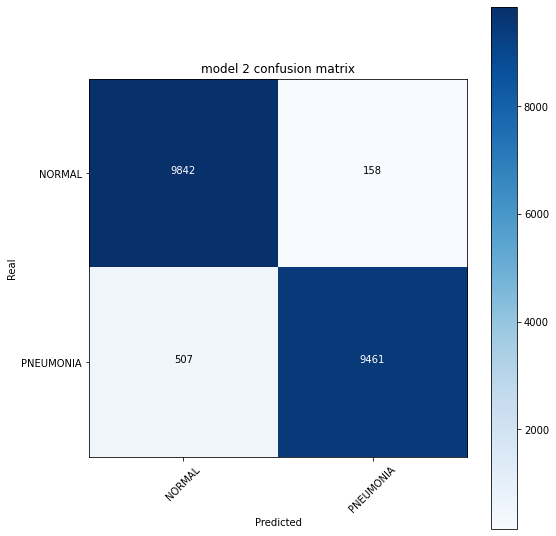

In [24]:
target_names = ['NORMAL','PNEUMONIA']
plot_confusion_matrix(conf_matrix_res, classes=target_names,
                          normalize=False,
                          title='model 2 confusion matrix',
                          cmap=plt.cm.Blues)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(label_n, predictions))

              precision    recall  f1-score   support

      Normal       0.95      0.98      0.97     10000
   Pneumonia       0.98      0.95      0.97      9968

    accuracy                           0.97     19968
   macro avg       0.97      0.97      0.97     19968
weighted avg       0.97      0.97      0.97     19968



 precision    recall  f1-score   support

      Normal       0.95      0.98      0.97     10000
   Pneumonia       0.98      0.95      0.97      9968

    accuracy                           0.97     19968
   macro avg       0.97      0.97      0.97     19968
weighted avg       0.97      0.97      0.97     19968


In [27]:
from keras.models import load_model
model = load_model('../input/model1/model2.h5')

In [28]:
from PIL import Image
im = Image.open('../input/covidxct/3A_images/137covid_patient100_SR_2_IM00028.png')

In [29]:
im = im.resize((244,244))
im = im.convert('RGB')

In [30]:
a = np.array(im)
a = np.expand_dims(a, 0)
a.shape

(1, 244, 244, 3)

In [31]:
p = model.predict(a)
p

array([[1., 0.]], dtype=float32)

In [32]:
p = np.argmax(p)
p

0

In [33]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False
    
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(2,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)


model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model2.summary()

94683136/94668760 [==============================] - 1s 0us/step


In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=3, restore_best_weights=True)

hist = model2.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,  callbacks=[callback])

Epoch 1/10
31/31 [==============================] - 16s 435ms/step - loss: 0.3174 - accuracy: 0.8833 - val_loss: 0.1818 - val_accuracy: 0.9245
Epoch 2/10
31/31 [==============================] - 13s 412ms/step - loss: 0.1273 - accuracy: 0.9623 - val_loss: 0.1341 - val_accuracy: 0.9583
Epoch 3/10
31/31 [==============================] - 13s 424ms/step - loss: 0.0959 - accuracy: 0.9762 - val_loss: 0.1329 - val_accuracy: 0.9583
Epoch 4/10
31/31 [==============================] - 13s 417ms/step - loss: 0.0666 - accuracy: 0.9845 - val_loss: 0.1313 - val_accuracy: 0.9583
Epoch 5/10
31/31 [==============================] - 13s 432ms/step - loss: 0.0601 - accuracy: 0.9845 - val_loss: 0.1289 - val_accuracy: 0.9453
Epoch 6/10
31/31 [==============================] - 13s 411ms/step - loss: 0.0464 - accuracy: 0.9928 - val_loss: 0.1271 - val_accuracy: 0.9557
Epoch 7/10
31/31 [==============================] - 13s 412ms/step - loss: 0.0334 - accuracy: 0.9954 - val_loss: 0.1265 - val_accuracy: 0.9531